# 问题描述 (Description)
假设一个质量为$m$的立方体，它的左边是一堵墙，右边有一个质量为$M$的正以速度为$V_0$向左移动，然后与$m$发生完全弹性碰撞，碰撞后$m$获得速度$v_1$,并开始向左边移动，然后与墙体也发生完全弹性碰撞，它的速度就由$v_1$变成$-v_1$,问：给定$M$的值，小$m$一共发会发生多少次碰撞？

Please check Wikipedia for the derivation[https://en.wikipedia.org/wiki/Elastic_collision]


根据动量守恒原理：
$$
mv_0 + MV_0 = mv_1 + MV_1
$$
机械能守恒原理（省略了二分之一）：
$$
mv_0^2 + MV_0^2=mv_1^2 + MV_1^2
$$

经过一点代数运算和重新调整变量的顺序：$$
V_1 = \frac{M-m}{M+m}V_0 + \frac{2m}{M+m}v_0\\
v_1 = \frac{2M}{M+m}V_0 + \frac{m-M}{M+m}v_0
$$


## 定义碰撞后速度公式 (Define functions to compute velocities after collision)
* 假设$m=1 $(let $m=1$)
* $V$ 和$v$取正值时表示 向右运动，负值表示向左运动

In [7]:
def get_V1(V0, v0, M=1): 
    #返回M碰撞后的速度
    # return the velocity of big M after collision
    return (M-1)*V0/(M + 1) + 2/(M+1)*v0 

def get_v1(V0, v0, M):
     #返回小m碰撞后的速度
    # return the velocity of small m after collision
    return 2*M*V0/(M+1) + (1-M)*v0/(1+M)

## 使用递归的算法 (Recursive Method)

In [8]:
def Sim(V0, v0=1, M=1):
    if(V0>=0 and v0 >=0 and V0 > v0):
        return 0
    if v0 < 0:
        return 1 + Sim(V0=V0, v0=-v0, M=M)
    V1 = get_V1(V0=V0, v0=v0, M=M)
    v1 = get_v1(V0=V0, v0=v0, M=M) 
    return 1 + Sim(V0=V1, v0=v1, M=M)

In [9]:
Sim(V0=-1, v0=0, M=1)

3

In [10]:
Sim(V0=-1, v0=0, M=100)

31

In [11]:
Sim(V0=-1, v0=0, M=10000)

314

## 使用非递归的算法 (Non-recursive method)

In [22]:
def SimFast(V0, v0, M=1):
    c = 0 # 碰撞次数 collison times
    Vs = []
    vs = []
    while (True):
        Vs.append(V0)
        vs.append(v0)
        # 当两个物体向右运动，最右边的速度大于第一个，模拟结束
        # simulation is done when the second M is fater than m and both move to right
        if V0>= 0 and v0 >= 0 and V0 > v0: 
            return c
        # 小m向左运动会撞墙，速度取反
        # the m will hit the wall and its velocity will be reversed
        if (v0 < 0):
            c = c+1
            v0 = -v0
            continue
        # 计算碰撞后的速度，为下一次模拟做准备
        # compute the velocities after collision, will be used for next collision        
        V1 = get_V1(V0=V0, v0=v0, M=M)
        v1 = get_v1(V0=V0, v0=v0, M=M)
        V0, v0 = V1, v1
        c = c + 1
    return c

In [19]:
SimFast(V0=-1, v0=0, M=1)

3

In [9]:
SimFast(V0=-1, v0=0, M=100)

31

In [10]:
SimFast(V0=-1, v0=0, M=10000)

314

In [15]:
SimFast(V0=-1, v0=0, M=100000000000000)

31415926

# 可视化 （Visualization）
* 可视化用到ipywidgets 组件，如果你的系统没有，可能运行出错，用 pip install ipywidgets 命令进行安装
* Here we use ipywidgets package for visulization, you may need to install it using command line: pip install ipywidgets

In [21]:
def SimFastEx(M=1):
    v0 = 0
    V0 = -1
    c = 0 # 碰撞次数 collison times
    Vs = []
    vs = []
    while (True):
        Vs.append(V0)
        vs.append(v0)
        # 当两个物体向右运动，最右边的速度大于第一个，模拟结束
        # simulation is done when the second M is fater than m and both move to right
        if V0>= 0 and v0 >= 0 and V0 > v0: 
            return (c, Vs, vs)
        # 小m向左运动会撞墙，速度取反
        # the m will hit the wall and its velocity will be reversed
        if (v0 < 0):
            c = c+1
            v0 = -v0
            continue
        # 计算碰撞后的速度，为下一次模拟做准备
        # compute the velocities after collision, will be used for next collision        
        V1 = get_V1(V0=V0, v0=v0, M=M)
        v1 = get_v1(V0=V0, v0=v0, M=M)
        V0, v0 = V1, v1
        c = c + 1
    return (c, Vs, vs)

* 将每次碰撞的速度绘制出来，Y轴表示大$M$的速度$V$， X轴表示小m的速度v
* Plot all $V$s and $v$s in a plane, where $y$ axis is the $V$, and $x$ axis is $v$

In [83]:
%pylab inline --no-import-all
from ipywidgets import interact
def f(E, T):
    """Fermi distribution function"""
    T = max(T, 1e-32)
    return 1./(1+np.exp(E/T))
@interact(n=(0, 5, 1))
def go(n):
    M = 100**n
    c, Vs, vs = SimFastEx(M=M)
    plt.figure(figsize=(8, 8))
    plt.plot(vs, Vs, '-o')
    plt.title(f"collision:{c}")
    plt.xlabel(r"$v$")
    plt.ylabel(r"$V$")
   

Populating the interactive namespace from numpy and matplotlib


interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

## 动态展示 (Animation)

In [84]:
from IPython.display import clear_output

def SimFastPlot(n=1): 
    assert n < 3    
    M = 100**n  
    v0 = 0
    V0 = -1
    c = 0 # 碰撞次数 collison times
    Vs = []
    vs = []
    fig = plt.figure(figsize=(8, 8))
    while (True):
        Vs.append(V0)
        vs.append(v0)
        plt.clf()
        plt.plot(vs, Vs, '-o')
        plt.xlabel(r"$v$")
        plt.ylabel(r"$V$")
        display(fig)
        clear_output(wait=True)
        # 当两个物体向右运动，最右边的速度大于第一个，模拟结束
        # simulation is done when the second M is fater than m and both move to right
        if V0>= 0 and v0 >= 0 and V0 > v0: 
            return #(c, Vs, vs)
        # 小m向左运动会撞墙，速度取反
        # the m will hit the wall and its velocity will be reversed
        if (v0 < 0):
            c = c+1
            v0 = -v0
            continue
        # 计算碰撞后的速度，为下一次模拟做准备
        # compute the velocities after collision, will be used for next collision        
        V1 = get_V1(V0=V0, v0=v0, M=M)
        v1 = get_v1(V0=V0, v0=v0, M=M)
        V0, v0 = V1, v1
        c = c + 1
    display(fig)

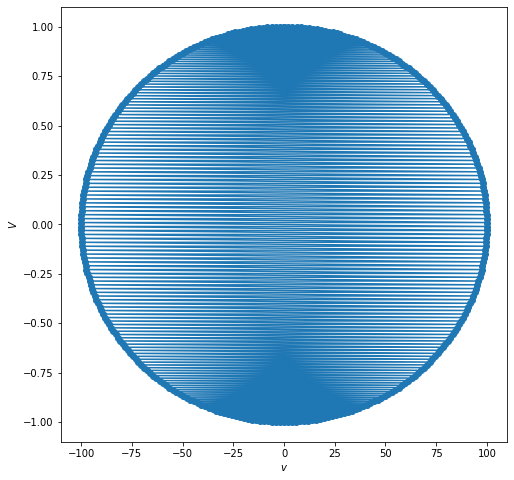

In [86]:
SimFastPlot(2);